In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
import sqlite3

conn = sqlite3.connect("22-28_09_23.db")
cursor = conn.cursor()
cursor.execute("SELECT NIK FROM TIF")

In [11]:
rows = cursor.fetchall()
data = []
for row in rows:
    #print(row[0])
    data.append(row[0])
data = np.array(data)

conn.close()

Hapus baris yang mengandung None atau NaN

In [13]:
data_clean = data[~np.isnan(data.astype(float)).flatten()]

Ekstraksi fitur

In [14]:
data_clean_str = [f"{int(nik):016d}" for nik in data_clean]

def extract_features(nik):
    kode_wilayah = int(nik[:6])
    tgl = int(nik[6:8])
    bln = int(nik[8:10])
    thn = int(nik[10:12])
    if tgl > 40: tgl -= 40
    tahun_lahir = 1900 + thn if thn > 25 else 2000 + thn
    return [kode_wilayah, bln, tahun_lahir]

data_fitur = np.array([extract_features(nik) for nik in data_clean_str])

Normalisasi

In [15]:
data_scaled = StandardScaler().fit_transform(data_fitur)

Clustering

In [16]:
db = DBSCAN(eps=1.0, min_samples=2)
labels = db.fit_predict(data_scaled)

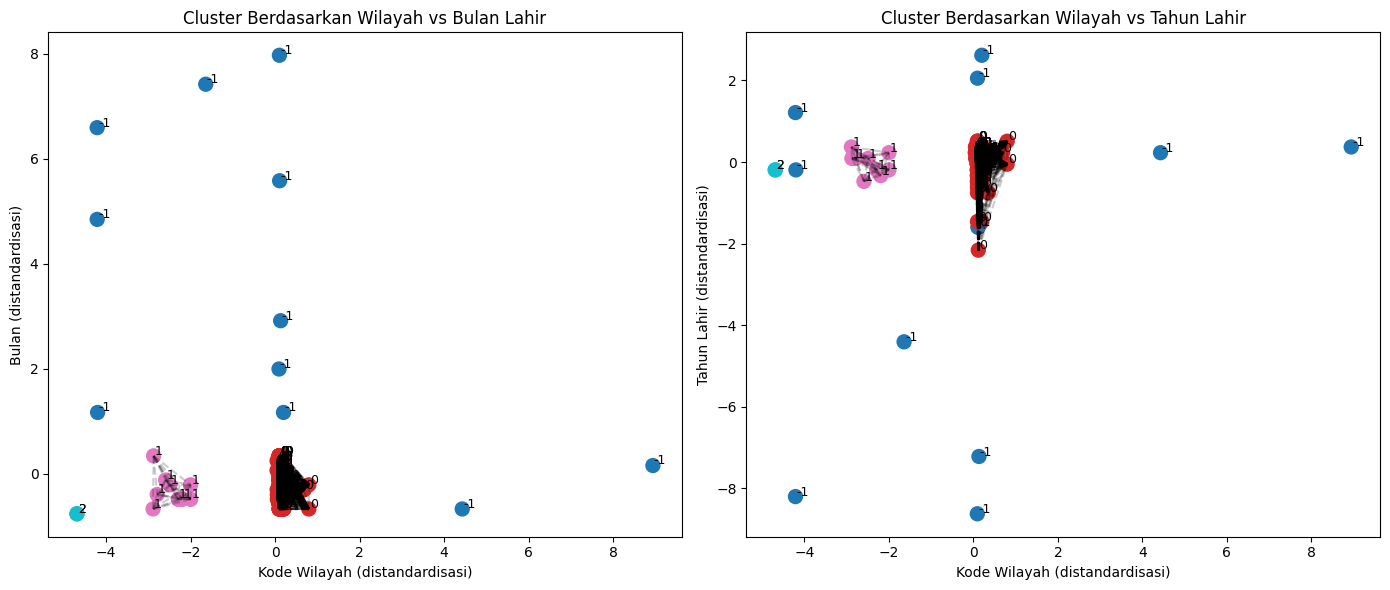

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Cluster Berdasarkan Wilayah vs Bulan Lahir')
scatter1 = ax1.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='tab10', s=100)
for i, label in enumerate(labels):
    ax1.text(data_scaled[i, 0]+0.02, data_scaled[i, 1]+0.02, str(label), fontsize=9)
ax1.set_xlabel('Kode Wilayah (distandardisasi)')
ax1.set_ylabel('Bulan (distandardisasi)')

ax2.set_title('Cluster Berdasarkan Wilayah vs Tahun Lahir')
scatter2 = ax2.scatter(data_scaled[:, 0], data_scaled[:, 2], c=labels, cmap='tab10', s=100)
for i, label in enumerate(labels):
    ax2.text(data_scaled[i, 0]+0.02, data_scaled[i, 2]+0.02, str(label), fontsize=9)
ax2.set_xlabel('Kode Wilayah (distandardisasi)')
ax2.set_ylabel('Tahun Lahir (distandardisasi)')

for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        if labels[i] == labels[j] and labels[i] != -1:
            ax1.plot([data_scaled[i,0], data_scaled[j,0]], [data_scaled[i,1], data_scaled[j,1]], 'k--', alpha=0.2)
            ax2.plot([data_scaled[i,0], data_scaled[j,0]], [data_scaled[i,2], data_scaled[j,2]], 'k--', alpha=0.2)

plt.tight_layout()
plt.show()


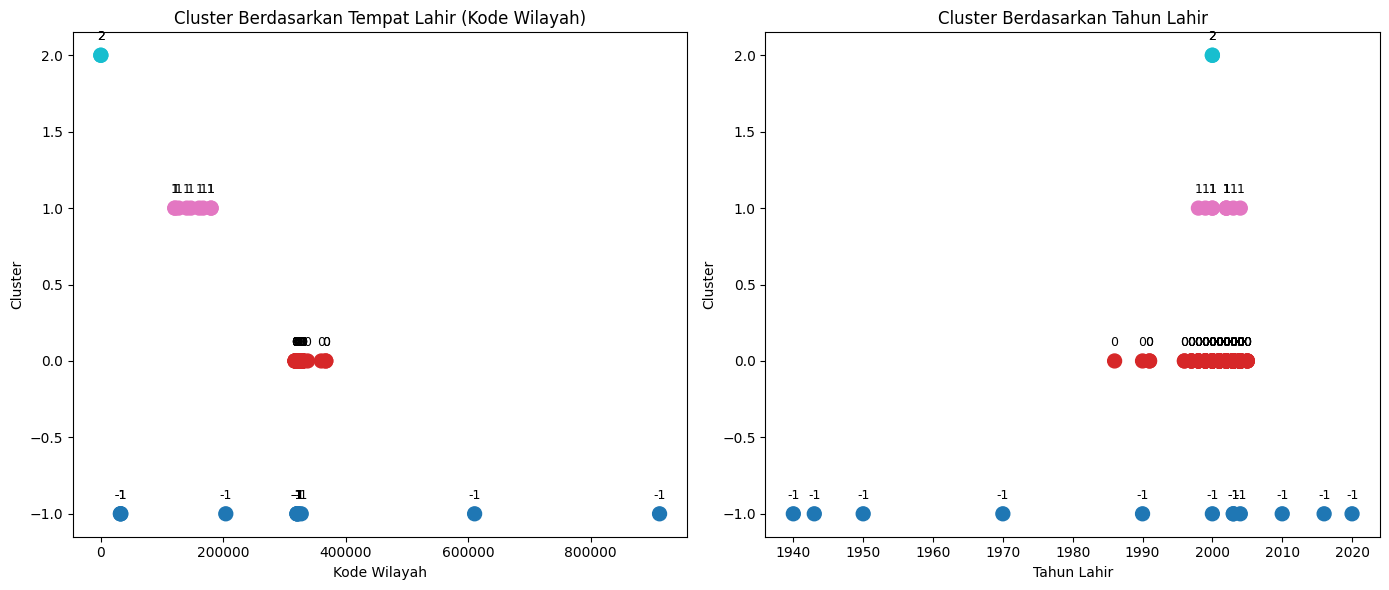

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Cluster Berdasarkan Tempat Lahir (Kode Wilayah)')
scatter1 = ax1.scatter(data_fitur[:, 0], labels, c=labels, cmap='tab10', s=100)
for i, label in enumerate(labels):
    ax1.text(data_fitur[i, 0], labels[i] + 0.1, str(label), fontsize=9, ha='center')
ax1.set_xlabel('Kode Wilayah')
ax1.set_ylabel('Cluster')

ax2.set_title('Cluster Berdasarkan Tahun Lahir')
scatter2 = ax2.scatter(data_fitur[:, 2], labels, c=labels, cmap='tab10', s=100)
for i, label in enumerate(labels):
    ax2.text(data_fitur[i, 2], labels[i] + 0.1, str(label), fontsize=9, ha='center')
ax2.set_xlabel('Tahun Lahir')
ax2.set_ylabel('Cluster')

plt.tight_layout()
plt.show()
